# Life Expectancy Prediction(WHO)

This notebook contains the models and analysis for the data pulled from life expectancy from WHO.

### Abstract: 

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status, as well as many other related factors for all countries The datasets, are made available to the public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries have been collected from the same WHO data repository website and its corresponding economic data was collected from the United Nation website. Among all categories of health-related factors, only those critical factors were chosen which are more representative. 

In this project, the dataset has 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables were then divided into several broad categories:Immunization related factors, Mortality factors, Economical factors, and Social factors. From the correlation matrix, 'Schooling' and 'Income Composition' are the major positive impacts of life expectancy, and 'Adult Mortality' is the major negative impact of life expectancy. In this project, we will stay away from time series, so we choose all the variables that except 'Years' to build regression models. The five regression models that created are Linear Regression, Lasso Regression, Ridge Regression, ElasticNet Regression, and Random Forest Regressor, the way to choose the best model is to calculate their mean square errors and R^2 scores. In this project, the best model is Random Forest Regressor, because it has the highest R^2 score(0.9475), and the lowest mean square error(4.147). Therefore, we will use Rando Forest Regressor to predict life expectancy by using these given variables.

### Introduction 

This dataset is comprised of data from all over the world from various countries aggregated by the World Health Organization. The data is an aggregate of many indicators for a particular country in a particular year. In essence, the data is multiple indicators in a time series separated by country.

The dataset has 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables were then divided into several broad categories: Immunization related factors, Mortality factors, Economical factors, and Social factors.

### Motivation 

Life expectancy is an educated prediction of human life. Through the comparative analysis of life expectancy, it can reflect the quality of life of a society and measure the health level of people in this country (or region). Everyone wants to have a longer life expectancy, and it can be affected by a lot of factors. Life expectancy is not only one of the important indicators to measure the health of the population, but also a comprehensive indicator to measure the level of economic and social development of a country or region. In population quality evaluation and prediction, disease burden measurement, and national economy and residents’ quality of life evaluation, life expectancy and other indicators are among the most basic research content. I am very interested in this topic because I am studying Health Informatics, and I hope to combine these two different expertise to analyze life expectancy.

### Goals:

The first goal for this project is to search for the elements which effects life expectancy by using statistical tools such as MSE, R squared, RMSE, ect. on different regression models.

The second goal for this project is to find the best regression model to predict life expectancy.

The third goal for this project is to find the answer for research questions.

### Research Questions:

    1: What are the major variables affecting the life expectancy?
    2: What is the impact of schooling on the lifespan of humans?
    3: What is the impact of Immunization coverage on life Expectancy?

## Exploratory Data Analysis

### Import libraries and the dataset:

In [1]:
import numpy as np #import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/naidanzheng/Downloads/Life Expectancy Data.csv') #read data

Data resource: https://www.kaggle.com/augustus0498/life-expectancy-who

In [3]:
df.columns=['Country', 'Year', 'Status', 'LifeExpectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percent Expenditure', 'Hep B',
       'Measles', 'BMI', 'U-5 Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS','GDP', 'Population', 'Thinness 10-19',
       'Thinness 5-9', 'Income Composition', 'Schooling']

In [4]:
df.head()

,Country,Year,Status,LifeExpectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Country- Country

Year- Year

Status- Developed or Developing status

Life Expectancy- Age(years)

Adult Mortality- Adult Mortality Rates of both sexes(probability of dying between 15&60 years per 1000 population)

Infant Deaths- Number of Infant Deaths per 1000 population

Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

Percent Expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hep B- Hepatitis B (HepB) immunization coverage among 1-year-olds(%)

Measles- number of reported measles cases per 1000 population

BMI- Average Body Mass Index of entire population

U-5 Deaths- Number of under-five deaths per 1000 population

Polio- Polio(Pol3) immunization coverage among 1-year-olds(%)

Total Expenditure- General government expenditure on health as a percentage of total government expenditure(%)

Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%)

HIV/AIDS- Deaths per 1000 live births HIV/AIDS(0-4 years)

GDP- Gross Domestic Product per capita(in USD)

Population- Population 

Thinness 10-19- Prevalence of thinness among children and adolescents for Age 10 to 19(%)

Thinness 5-9- Prevalence of thinness among children for Age 5 to 9(%)

Income Composition- Human Development Index in terms of income composition of resources(0-1)

Schooling- Number of years of Schooling

In [5]:
df.shape

(2938, 22)

In [6]:
df.describe()

,Year,LifeExpectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Cleaning Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                2938 non-null object
Year                   2938 non-null int64
Status                 2938 non-null object
LifeExpectancy         2928 non-null float64
Adult Mortality        2928 non-null float64
Infant Deaths          2938 non-null int64
Alcohol                2744 non-null float64
Percent Expenditure    2938 non-null float64
Hep B                  2385 non-null float64
Measles                2938 non-null int64
BMI                    2904 non-null float64
U-5 Deaths             2938 non-null int64
Polio                  2919 non-null float64
Total Expenditure      2712 non-null float64
Diphtheria             2919 non-null float64
HIV/AIDS               2938 non-null float64
GDP                    2490 non-null float64
Population             2286 non-null float64
Thinness 10-19         2904 non-null float64
Thinness 5-9           2904 non-null float64
Inc

In [8]:
print(df.isnull().sum()) #numbers of null values.

Country                  0
Year                     0
Status                   0
LifeExpectancy          10
Adult Mortality         10
Infant Deaths            0
Alcohol                194
Percent Expenditure      0
Hep B                  553
Measles                  0
BMI                     34
U-5 Deaths               0
Polio                   19
Total Expenditure      226
Diphtheria              19
HIV/AIDS                 0
GDP                    448
Population             652
Thinness 10-19          34
Thinness 5-9            34
Income Composition     167
Schooling              163
dtype: int64


In [9]:
df.dropna(inplace=True)  #drop null values

In [10]:
df.isnull().sum() #no null values

Country                0
Year                   0
Status                 0
LifeExpectancy         0
Adult Mortality        0
Infant Deaths          0
Alcohol                0
Percent Expenditure    0
Hep B                  0
Measles                0
BMI                    0
U-5 Deaths             0
Polio                  0
Total Expenditure      0
Diphtheria             0
HIV/AIDS               0
GDP                    0
Population             0
Thinness 10-19         0
Thinness 5-9           0
Income Composition     0
Schooling              0
dtype: int64

In [11]:
df #1,649 rows after dropping null values.

,Country,Year,Status,LifeExpectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [12]:
df.describe()

,Year,LifeExpectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


The average life expectancy is 69.3 years, the minimum life expectancy is 44 years, and maximum life expectancy is 89 years. 

-rows before droping nulls: 2938

-rows after droping nulls: 1649

## Feature Engineering

In [13]:
%matplotlib inline    #visualization
import matplotlib.pyplot as plt
import scipy.stats as stats

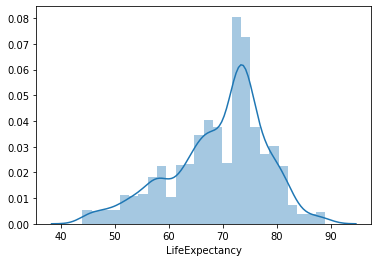

In [14]:
sns.distplot(df['LifeExpectancy'])

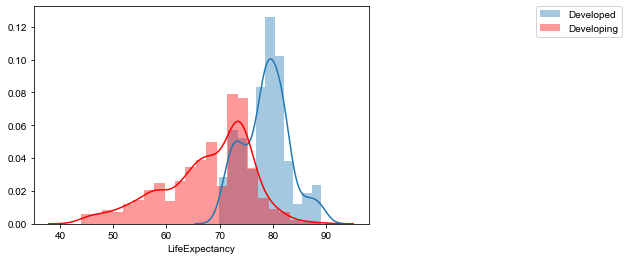

In [15]:
sns.distplot(df[df['Status']=='Developed']['LifeExpectancy'])
sns.distplot(df[df['Status']=='Developing']['LifeExpectancy'],color='red')
labels=['Developed','Developing']
plt.legend(labels=labels,bbox_to_anchor=(1.5, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(8,8)})
plt.show() 

This graph shows the different life expectancy in developed and developing countries.

People who live in developed countries have longer life expectancy than people who live in developing country.

In [16]:
df['LifeExpectancy'].groupby(df['Status']).describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Developed,242.0,78.691736,4.273485,69.9,75.55,78.95,81.4,89.0
Developing,1407.0,67.687349,8.353983,44.0,62.80,69.20,73.8,89.0


The average life expectancy of developed countries is 78.69 years, the average life expectacy of developing countries is 67.69 years. 

There is a large difference of min life expectancy between developed(69.9 years) and developing(44 years) countries. It may be because developing countries have better infrastructure, healthcare, welfare than developing countries.

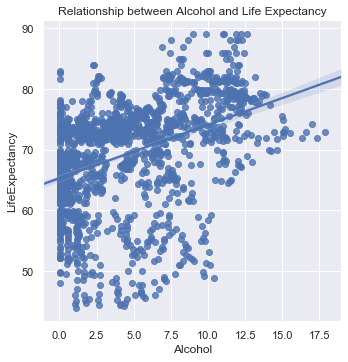

In [17]:
sns.lmplot(x='Alcohol',y='LifeExpectancy',data=df,fit_reg=True)
plt.title("Relationship between Alcohol and Life Expectancy")
plt.show()

Surprisingly, there is a moderate positive correlation between ‘Alcohol’ and ‘Life Expectancy’ of 0.40, it may be because only wealthier countries can afford alcohol or the consumption of alcohol is more prevalent among wealthier populations.

##### Question 2: What is the impact of schooling on the lifespan of humans?

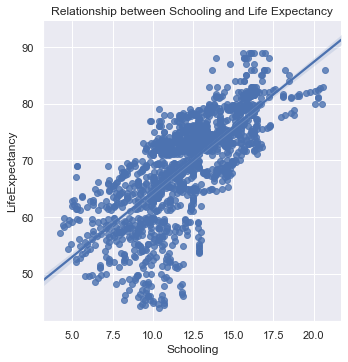

In [18]:
sns.lmplot(x='Schooling',y='LifeExpectancy',data=df,fit_reg=True)
plt.title("Relationship between Schooling and Life Expectancy")
plt.show()

There is a strong correlation relationship between 'Schooling' and 'Life Expectancy' of 0.728.
This may be because education is more established and prevalent in wealthier countries.

#### Question 3:   What is the impact of Immunization coverage on life Expectancy?

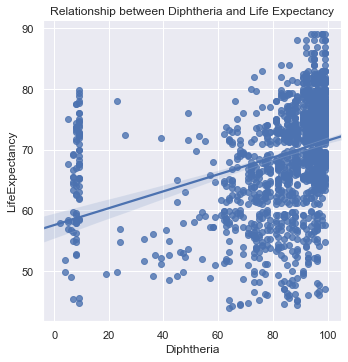

In [19]:
sns.lmplot(x='Diphtheria',y='LifeExpectancy',data=df,fit_reg=True)
plt.title("Relationship between Diphtheria and Life Expectancy")
plt.show()

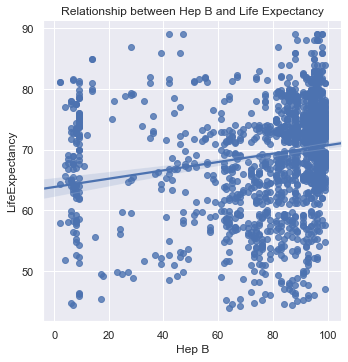

In [20]:
sns.lmplot(x='Hep B',y='LifeExpectancy',data=df,fit_reg=True)
plt.title("Relationship between Hep B and Life Expectancy")
plt.show()

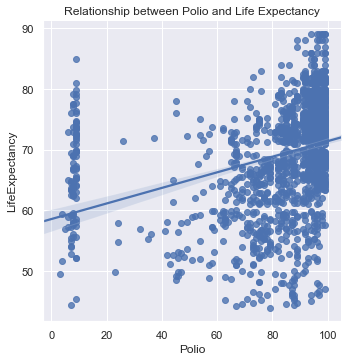

In [21]:
sns.lmplot(x='Polio',y='LifeExpectancy',data=df,fit_reg=True)
plt.title("Relationship between Polio and Life Expectancy")
plt.show()

Polio, Hep B and Diphtheria have positive linear relationships with life expectancy. 

They are contributing for increase in life expectancy. But they are not major impacts.

#### Correlation between all variables.

In [22]:
df=df.drop(['Year', 'Population'], axis=1) #stay away from Time Series this time.

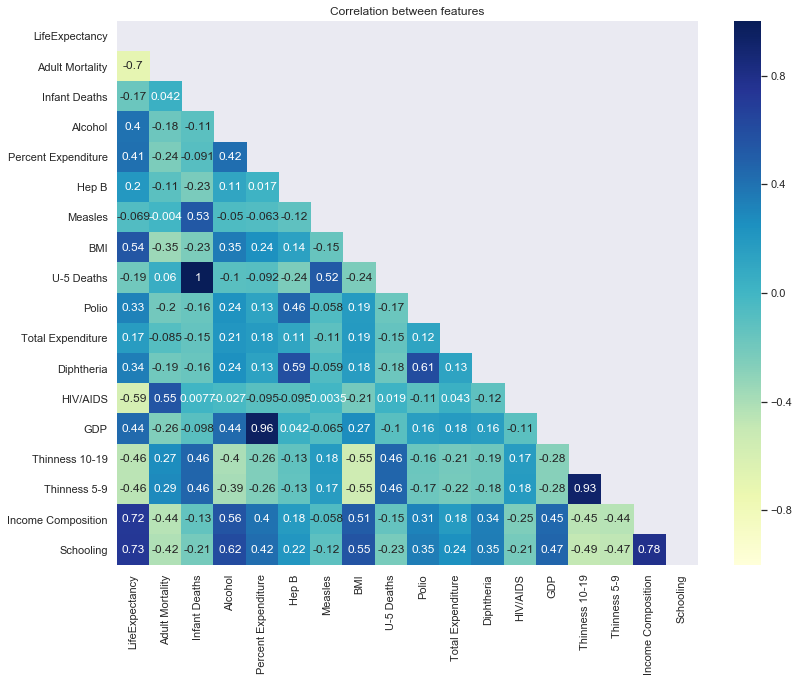

In [23]:
mask = np.triu(df.corr())
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='YlGnBu', mask=mask)
plt.ylim(18, 0)
plt.title('Correlation between features')
plt.show() #Correlation Matrix

In [24]:
corrmat=df.corr()
corrmat['LifeExpectancy'].sort_values(ascending = False)

LifeExpectancy         1.000000
Schooling              0.727630
Income Composition     0.721083
BMI                    0.542042
GDP                    0.441322
Percent Expenditure    0.409631
Alcohol                0.402718
Diphtheria             0.341331
Polio                  0.327294
Hep B                  0.199935
Total Expenditure      0.174718
Measles               -0.068881
Infant Deaths         -0.169074
U-5 Deaths            -0.192265
Thinness 5-9          -0.457508
Thinness 10-19        -0.457838
HIV/AIDS              -0.592236
Adult Mortality       -0.702523
Name: LifeExpectancy, dtype: float64

From above, Schooling and Income Composition are the major positive impacts of life expectancy, and Adult Mortality is the major negative impact of life expectancy. 

Using these variables to create models and predict life expectancy accurately.

## Modeling

### Multi Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
df = df.drop(['Country','Status'], axis=1)
y = df['LifeExpectancy'].values
X_all = df.drop(['LifeExpectancy'], axis=1).values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

In [27]:
print(X_train.shape) #training dataset has 1,154 rows.
print(X_test.shape) #test dastaet has 495 rows.

(1154, 17)
(495, 17)


In [28]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('R^2 score of linear regression: {}'.format(reg.score(X_test, y_test))) #Calculate r^2 score
print('mse f linear regression: {}'.format(mean_squared_error(y_test, y_pred))) #calculate mean square error.

R^2 score of linear regression: 0.8262402459694678
mse f linear regression: 13.726773188134132


In [29]:
y_hat = reg.predict(X_train)

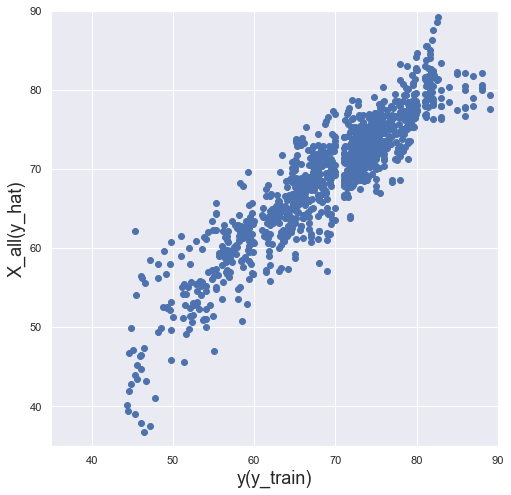

In [30]:
plt.scatter(y_train, y_hat)
plt.xlabel('y(y_train)', size =18)
plt.ylabel('X_all(y_hat)', size=18)
plt.xlim(35,90)
plt.ylim(35,90)
plt.show()

### Lasso Regression

In [31]:
from sklearn.linear_model import Lasso

In [32]:
lasso_model = Lasso(alpha=0.1, max_iter=10e5)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
ypredict_lasso = lasso_model.predict(X_test)
print('mse of Lasso Regression: {}'.format(mean_squared_error(y_test, ypredict_lasso))) #calculate mean square error
print('r^2 score of Lasso Regression: {}'.format(r2_score(y_test, ypredict_lasso)))    #calculate r^2 score

mse of Lasso Regression: 14.674035047613183
r^2 score of Lasso Regression: 0.8142493734279249


In [34]:
y_hat1 = lasso_model.predict(X_train)

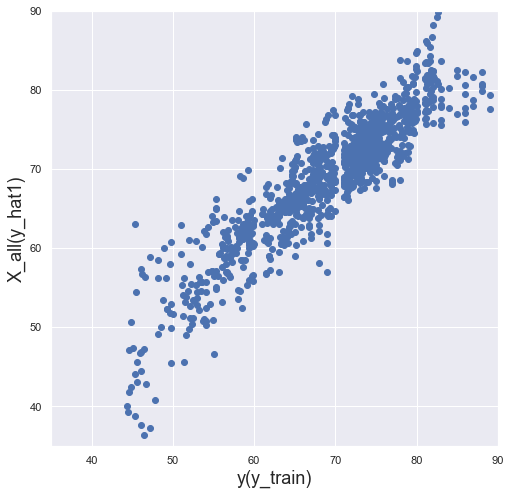

In [35]:
plt.scatter(y_train, y_hat1)
plt.xlabel('y(y_train)', size =18)
plt.ylabel('X_all(y_hat1)', size=18)
plt.xlim(35,90)
plt.ylim(35,90)
plt.show()

### Ridge Regression

In [36]:
from sklearn.linear_model import Ridge 

In [37]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
ypredict_ridge = ridge_model.predict(X_test)

In [39]:
print('mse of Ridge Regression: {}'.format(mean_squared_error(y_test, ypredict_ridge)))  #calculate mean square error
print('r^2 score of Ridge Regression: {}'.format(r2_score(y_test, ypredict_ridge)))      #calculate r^2 score

mse of Ridge Regression: 13.73253754378956
r^2 score of Ridge Regression: 0.8261672781272004


In [40]:
y_hat2 = ridge_model.predict(X_train)

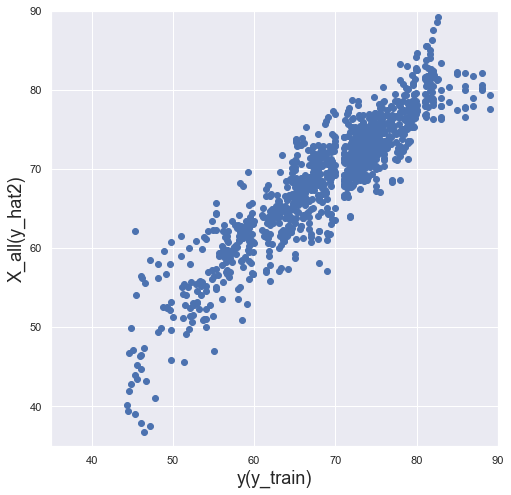

In [41]:
plt.scatter(y_train, y_hat2)
plt.xlabel('y(y_train)', size =18)
plt.ylabel('X_all(y_hat2)', size=18)
plt.xlim(35,90)
plt.ylim(35,90)
plt.show()

### RANSAC Regression

In [42]:
from sklearn.linear_model import RANSACRegressor
ransac=RANSACRegressor(LinearRegression(),max_trials=120,min_samples=50,
                      loss='absolute_loss',residual_threshold=5.0,
                       random_state=42)
ransac.fit(X_train,y_train)
ransac_pred=ransac.predict(X_test)

In [43]:
print('mse of RANSAC Regression: {}'.format(mean_squared_error(y_test, ransac_pred)))   #calculate mean square error
print('r^2 score of RANSAC Regression: {}'.format(r2_score(y_test, ransac_pred)))       #calculate r^2 score

mse of RANSAC Regression: 17.60550482504585
r^2 score of RANSAC Regression: 0.7771414923189869


In [44]:
y_hat3 = ransac.predict(X_train)

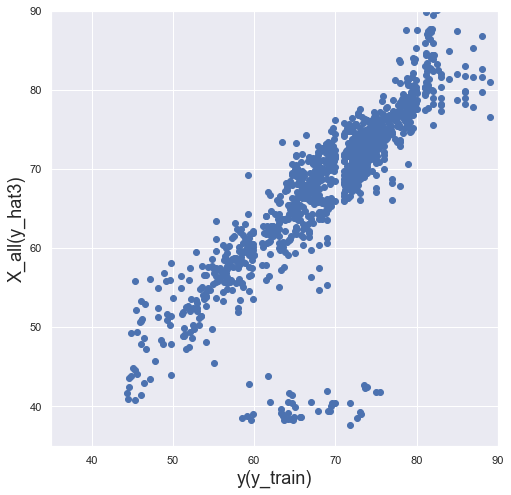

In [45]:
plt.scatter(y_train, y_hat3)
plt.xlabel('y(y_train)', size =18)
plt.ylabel('X_all(y_hat3)', size=18)
plt.xlim(35,90)
plt.ylim(35,90)
plt.show()

### ElasticNet Regression 

In [46]:
from sklearn.linear_model import ElasticNet
ela=ElasticNet(alpha=0.1, l1_ratio=0.5)
ela.fit(X_train,y_train)
ela_pred=ela.predict(X_test)

In [47]:
print('mse of Ridge Regression: {}'.format(mean_squared_error(y_test, ela_pred)))    #calculate mean square error
print('r^2 score of Ridge Regression: {}'.format(r2_score(y_test, ela_pred)))        #calculate r^2 score

mse of Ridge Regression: 14.74472767192143
r^2 score of Ridge Regression: 0.8133545139556206


In [48]:
y_hat4 = ela.predict(X_train)

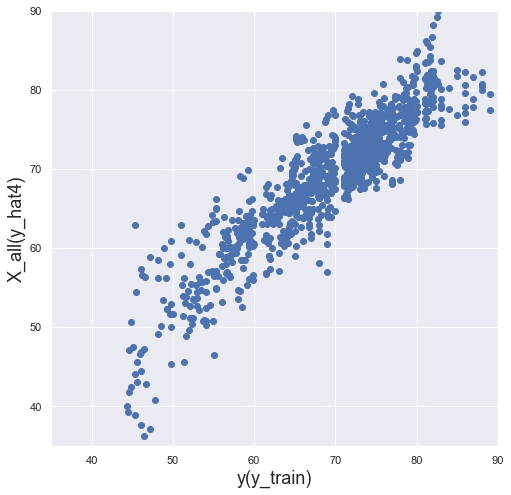

In [49]:
plt.scatter(y_train, y_hat4)
plt.xlabel('y(y_train)', size =18)
plt.ylabel('X_all(y_hat4)', size=18)
plt.xlim(35,90)
plt.ylim(35,90)
plt.show()

### Random Forest Regressor 

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=42)
rf.fit(X_train,y_train)
rs_pred=rf.predict(X_test)
print('mse of Random Forest Regressor:',mean_squared_error(y_test,rs_pred))     #calculate mean square error
print('r^2 of Random Forest Regressor:',r2_score(y_test,rs_pred))               #calculate r^2 score

mse of Random Forest Regressor: 4.147042094606061
r^2 of Random Forest Regressor: 0.9475048502341459


In [51]:
y_hat5 = rf.predict(X_train)

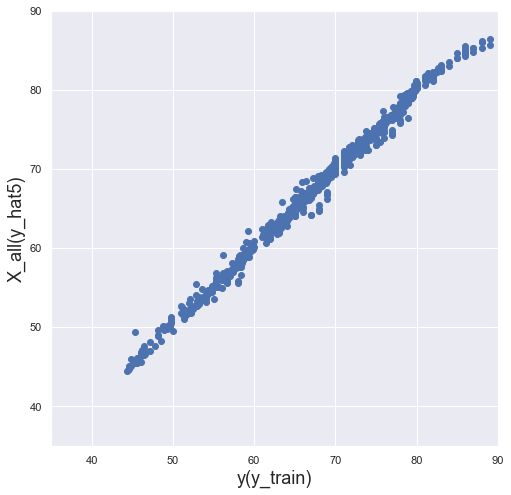

In [52]:
plt.scatter(y_train, y_hat5)
plt.xlabel('y(y_train)', size =18)
plt.ylabel('X_all(y_hat5)', size=18)
plt.xlim(35,90)
plt.ylim(35,90)
plt.show()

Data is more concentrated in random forest regressor model. 

We need to compare r^2 scores and mean square errors of these five models to determine the best model.

## Model evaluation and Selection

In [55]:
print('r^2 score of Multi-linear regression: {}'.format(reg.score(X_test, y_test)))

print('r^2_score of Lasso Regression: {}'.format(r2_score(y_test, ypredict_lasso)))

print('r^2 score of Ridge Regression: {}'.format(r2_score(y_test, ypredict_ridge)))

print('r^2 score of Ridge Regression: {}'.format(r2_score(y_test, ela_pred)))

print('r^2 score of Random Forest Regressor:',r2_score(y_test,rs_pred))

r^2 score of Multi-linear regression: 0.8262402459694678
r^2_score of Lasso Regression: 0.8142493734279249
r^2 score of Ridge Regression: 0.8261672781272004
r^2 score of Ridge Regression: 0.8133545139556206
r^2 score of Random Forest Regressor: 0.9475048502341459


In [54]:
print('mse of Multi-linear regression: {}'.format(mean_squared_error(y_pred, y_test)))

print('mse of Lasso Regression: {}'.format(mean_squared_error(y_test, ypredict_lasso)))

print('mse of Ridge Regression: {}'.format(mean_squared_error(y_test, ypredict_ridge)))

print('mse of Ridge Regression: {}'.format(mean_squared_error(y_test, ela_pred)))

print('mse of Random Forest Regressor:',mean_squared_error(y_test,rs_pred))

mse of Multi-linear regression: 13.726773188134132
mse of Lasso Regression: 14.674035047613183
mse of Ridge Regression: 13.73253754378956
mse of Ridge Regression: 14.74472767192143
mse of Random Forest Regressor: 4.147042094606061


Random Forest Regressor has highest R^2 score(0.9475), and lowest mean square error(4.147).

Therefore, for these five models, Random Forest Regressor is the best model to predict life expectancy by giving these variables.

##  Conclusion

### Answers of Research Questions:

    1: What are the major variables affecting the life expectancy?
    Answer:Schooling and Income Composition are the major positive impacts of life expectancy, and Adult Mortality is the major negative impact of life expectancy.
    
    2: What is the impact of schooling on the lifespan of humans?
    Answer:There is a strong correlation relationship between 'Schooling' and 'Life Expectancy' of 0.728. This may be because education is more established and prevalent in wealthier countries.
    
    3: What is the impact of Immunization coverage on life Expectancy?
    Answer:Polio, Hep B and Diphtheria have positive linear relationships with life expectancy. They are contributing for increase in life expectancy. But they are not major impacts.

Life expectancy is determined by immunization related factors, mortality factors, economical factors, and social factors. 'Schooling' and 'Income Composition' are the major positive impacts of life expectancy, and 'Adult Mortality' is the major negative impact of life expectancy.

In this project, the best model is Random Forest Regressor, because it has the highest R^2 score(0.9475), and the lowest mean square error(4.147). Therefore, we will use Random Forest Regressor to predict life expectancy by using these given variables.

###  Future Work

To derive even more accurate results, we'd like to expand the project with additional data, specifically 'Years'. Therefore, we will use the Time Series analysis to improve our model. Also, we can add 'gender','exercise' and 'crime rates' variables to analyze the relationships with life expectancy.

### Resource

https://medium.com/towards-artificial-intelligence/machine-learning-algorithms-for-beginners-with-python-code-examples-ml-19c6afd60daa

https://www.analyticssteps.com/blogs/7-types-regression-technique-you-should-know-machine-learning